## Summary - ACS234 Maths and Data Modelling 

#### What you learned this semester :

1. Interpolation
    - Polynomial 
    - Lagrange 
    - Newton 
    
    
2. Regression
    - Simple Linear Regression
    - Multiple Linear Regression
    - Polynomial Regression
    - General Linear Regression
    - Non Linear Regression
    
    
3. Differential equations
    - Euler’s, Mid Point, Heun’s, RK4 method
    - High Order differential equations

## Case Study : Covid 19 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pyross
import time 
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import cm

### Read data

In [2]:
# Get the latest data from Johns Hopkins University
!git clone https://github.com/CSSEGISandData/COVID-19

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [3]:
cases = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
                     

In [4]:
cases[cases['Country/Region']=='United Kingdom']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,118,119,121,121,122,122,123,123,125,125
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,81,84,85,86,93,94,94,94,94,111
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,545,546,547,548,549,549,554,554,555,555
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,146,147,148,147,147,147,147,147,147,147
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,330,330,331,332,332,334,335,335,335,335
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,219183,223060,226463,229705,233151,236711,240161,243695,246406,248818
248,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
249,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,7,7,7,7,7,8,8,8,8,8
250,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


No handles with labels found to put in legend.
No handles with labels found to put in legend.


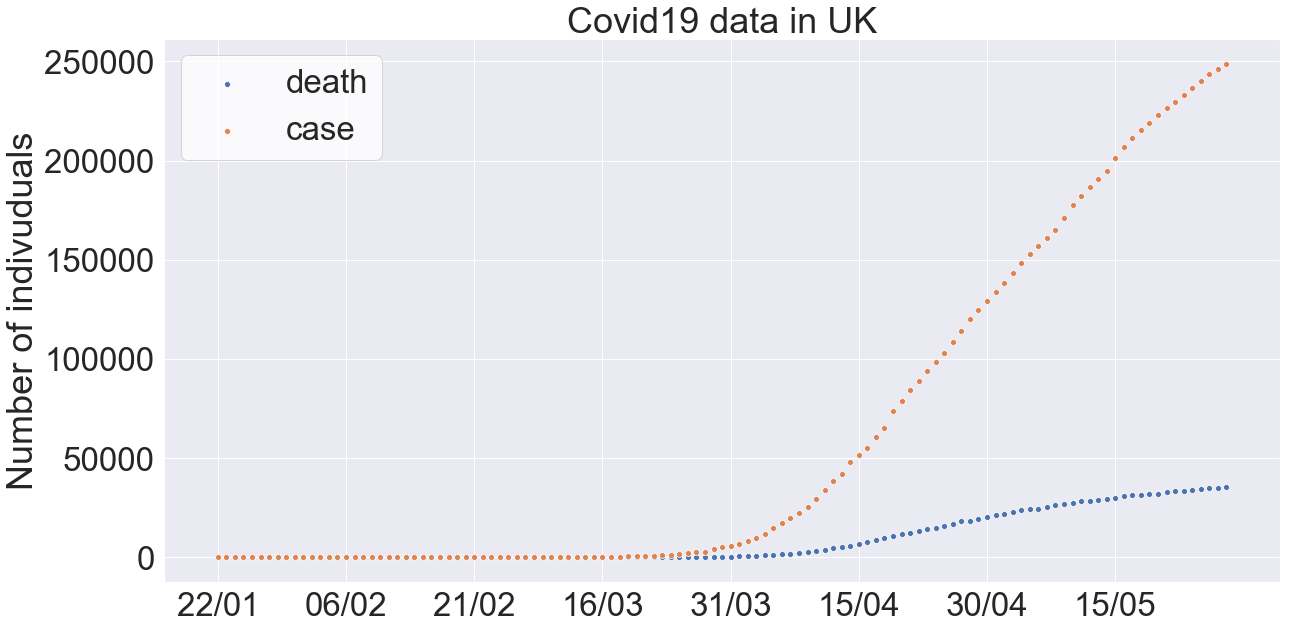

In [5]:
cols = cases.columns.tolist() 
case = cases.loc[223,][4:]
death = deaths.loc[223,][4:]
plt.figure(figsize=(20,10))
sns.set(font_scale=3) 
plt.legend(fontsize='x-large', title_fontsize='1000')
sns.set_style(style='white')
plt.legend(fontsize='x-large', title_fontsize='10000')
sns.scatterplot(np.arange(len(death)),death, label='death');
sns.scatterplot(x=np.arange(len(case)), y=case, label='case');
plt.ylabel('Number of indivuduals')
plt.title('Covid19 data in UK')
plt.xticks(np.arange(0, 115,15), ('22/01', '06/02', '21/02', '16/03', '31/03', '15/04','30/04', '15/05', '19/05'));
plt.savefig('UKcovid19.png', format='png', dpi=200)

In [6]:
y = np.array(case)
x = np.arange(len(y))
data = np.array([x,y])

In [7]:
index = np.random.choice(data[0][50:],10)
x2 = np.sort(index)
y2 = np.array([data[1][i] for i in x2])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


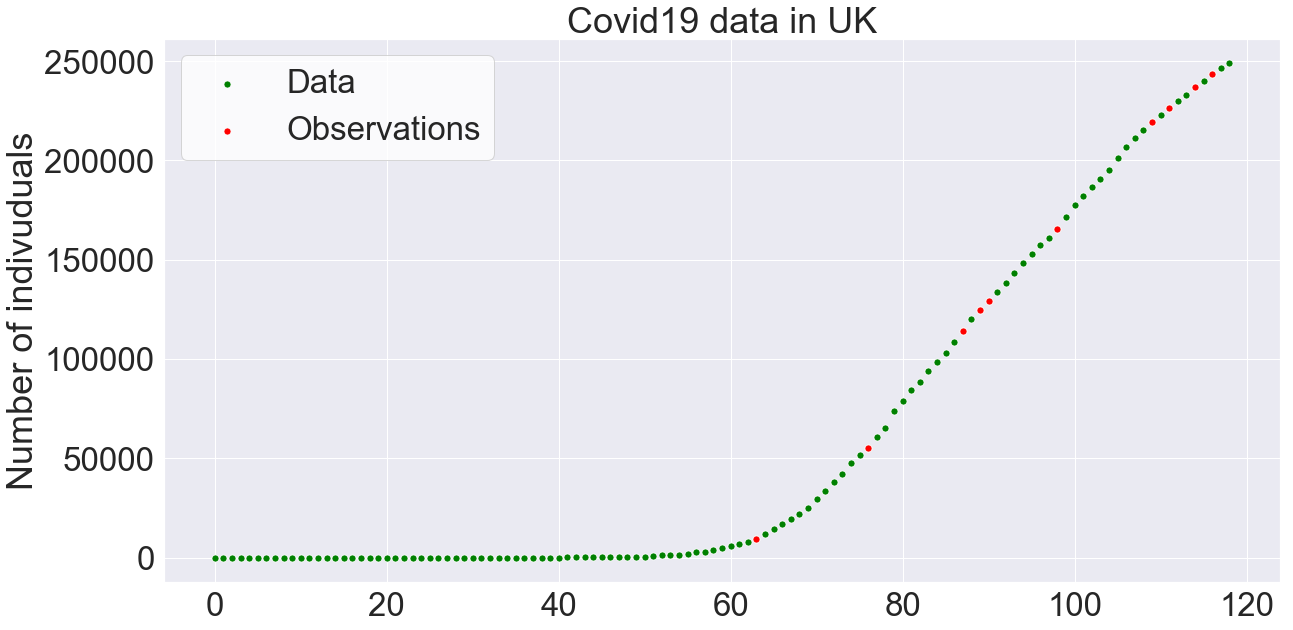

In [8]:
plt.figure(figsize=(20,10))
sns.set(font_scale=3)  # crazy big
plt.legend(fontsize='x-large', title_fontsize='1000')
sns.set_style(style='white')
plt.legend(fontsize='x-large', title_fontsize='10000')
sns.scatterplot(x, y, s=50, color='green', label='Data')
sns.scatterplot(x2, y2, s=50, color='red', label='Observations')
plt.ylabel('Number of indivuduals')
plt.title('Covid19 data in UK')
plt.legend;

## 1. Interpolation

#### Lagrange Interpolation

In [9]:
class Lagrange_interpolation():
    """x, y : data points in numpy.array type """
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    
    def Lagrange_coefficients (self, e): 
        total = 0
        for j in range(len(self.x)):
            yj = self.y[j]
                
            tot_mul = 1
            for i in range(len(self.x)):
                if i == j:
                    continue
                xi, xj = self.x[i], self.x[j]
                tot_mul *= (e - xi) / float(xj - xi)
       
            total += yj * tot_mul
                
        return(total)
    
    def plot_point(self):
        return (plt.scatter( self.x, self.y, s=50, color='red'))
        
    
    def plot_polynomial(self):
        xs = np.linspace(self.x[0]-10, self.x[len(self.x)-1]+10, num=1000)
        l=[]
        for i in xs :
            l.append(self.Lagrange_coefficients(i))
        self.plot_point()
        return (plt.plot( xs, l, color='black'))
        

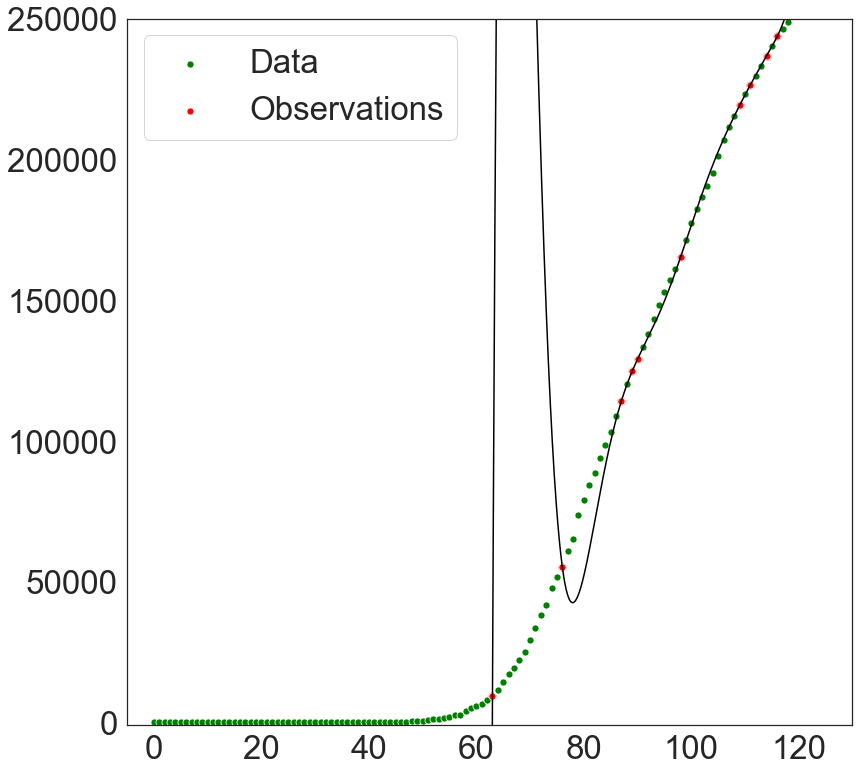

In [10]:
fig = plt.figure(figsize=(13, 13))
lag = Lagrange_interpolation(x2,y2)
lag.plot_polynomial();
plt.xlim(-5,130)
plt.ylim(-1000,250000)
sns.scatterplot(x, y, s=50, color='green', label='Data')
sns.scatterplot(x2, y2, s=50, color='red', label='Observations');

## 2. Regression

#### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression(fit_intercept =  True)
reg.fit(x2.reshape(-1, 1),y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

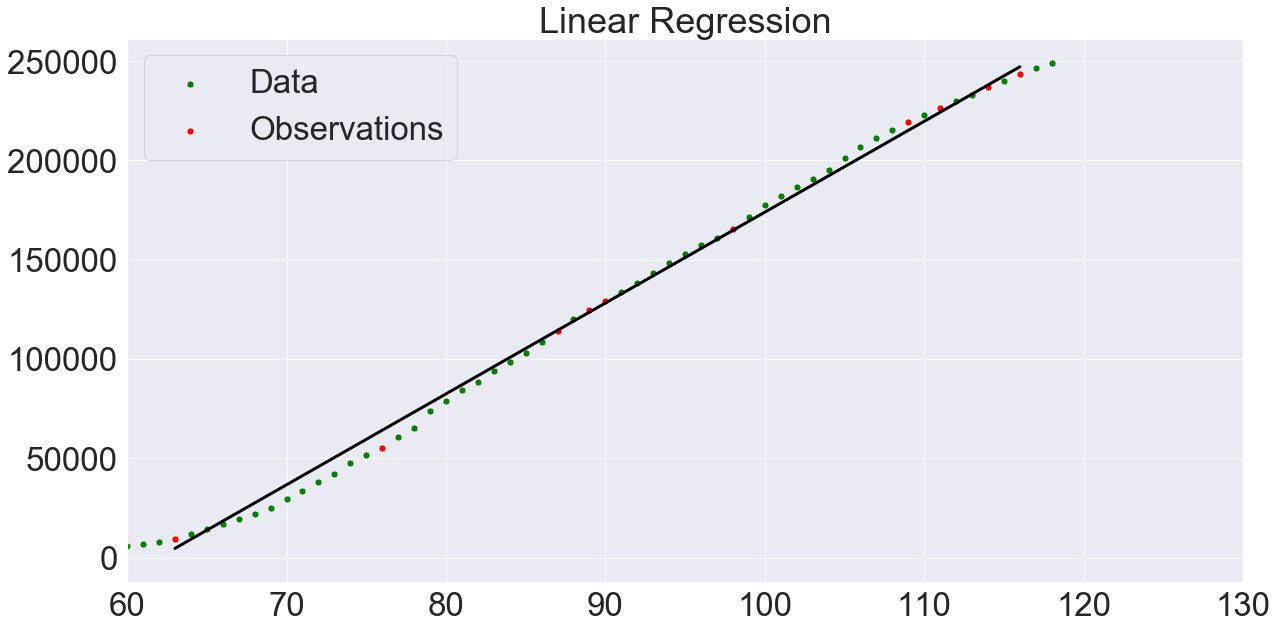

In [13]:
plt.figure(figsize=(20,10))
sns.set(font_scale=3)
sns.scatterplot(x, y, s=50, color='green', label='Data')
sns.scatterplot(x2, y2, s=50, color='red', label='Observations')
plt.plot(x2, reg.predict(x2.reshape(-1, 1)), color = 'black', linewidth = 3)
plt.xlim(60, 130)
plt.title('Linear Regression');

#### Polynomial regression

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [15]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(x2.reshape(-1, 1), y2)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

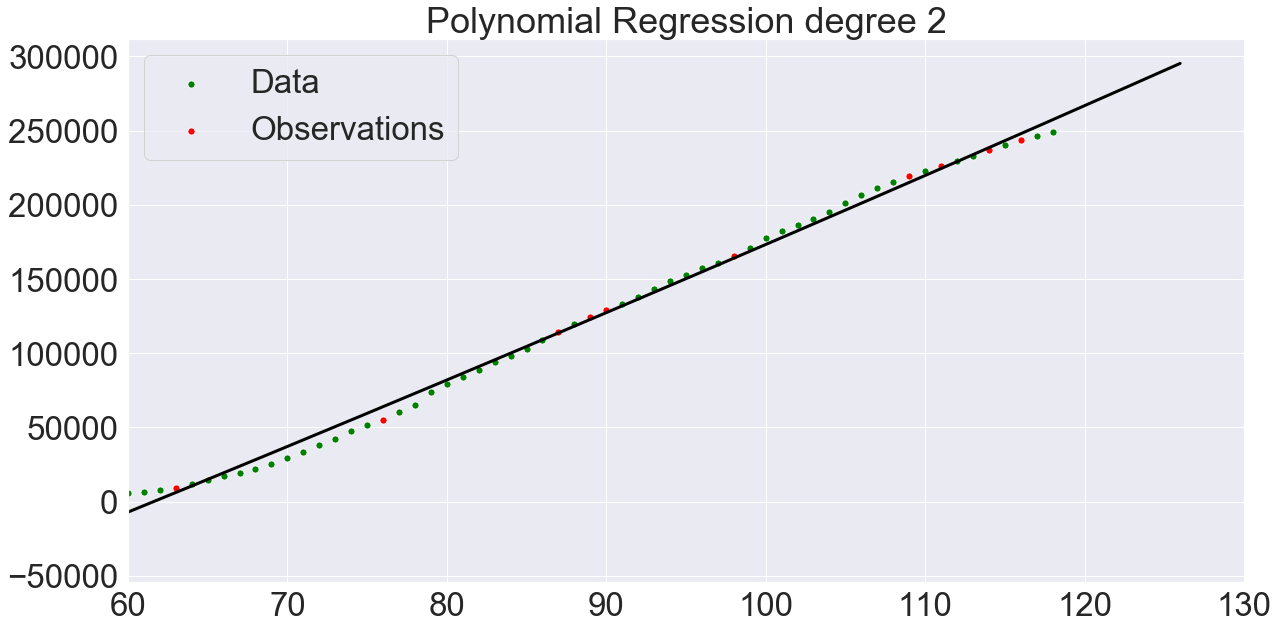

In [16]:
plt.figure(figsize=(20,10))
sns.set(font_scale=3)
sns.scatterplot(x, y, s=50, color='green', label='Data')
sns.scatterplot(x2, y2, s=50, color='red', label='Observations')
ts = np.linspace(x2[0]-10, x2[len(x2)-1]+10, num=1000)
plt.plot(ts, model.predict(ts.reshape(-1, 1)), color = 'black', linewidth = 3)
plt.xlim(60, 130)
plt.title('Polynomial Regression degree 2');

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.09558e-17): result may not be accurate.
  overwrite_a=True).T


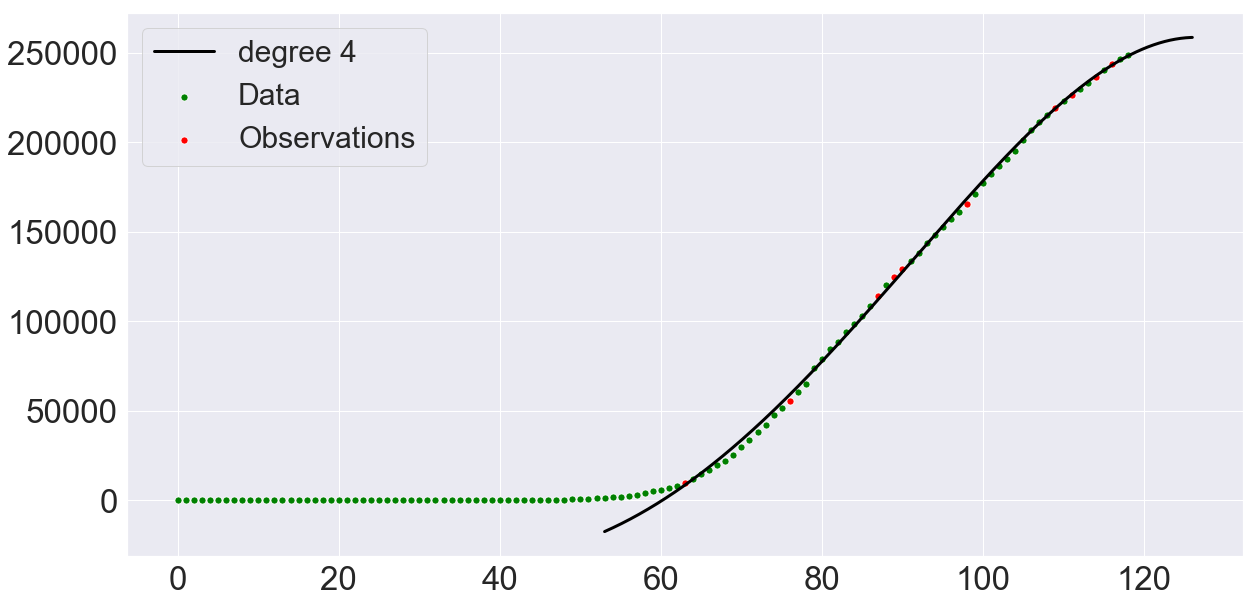

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.01485e-21): result may not be accurate.
  overwrite_a=True).T


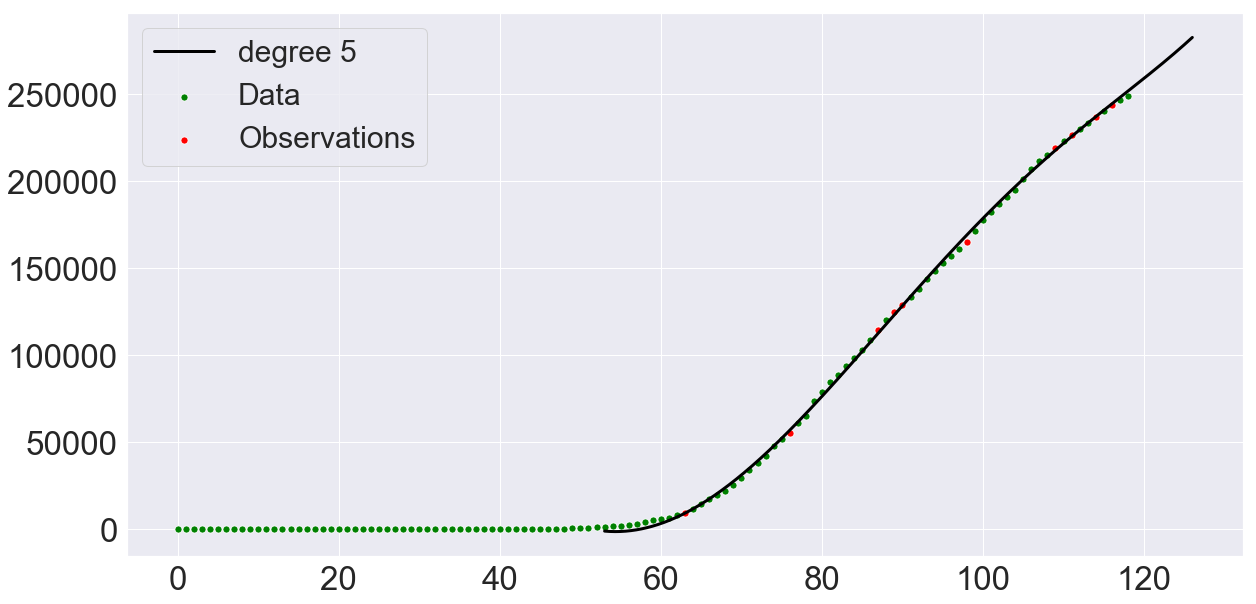

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


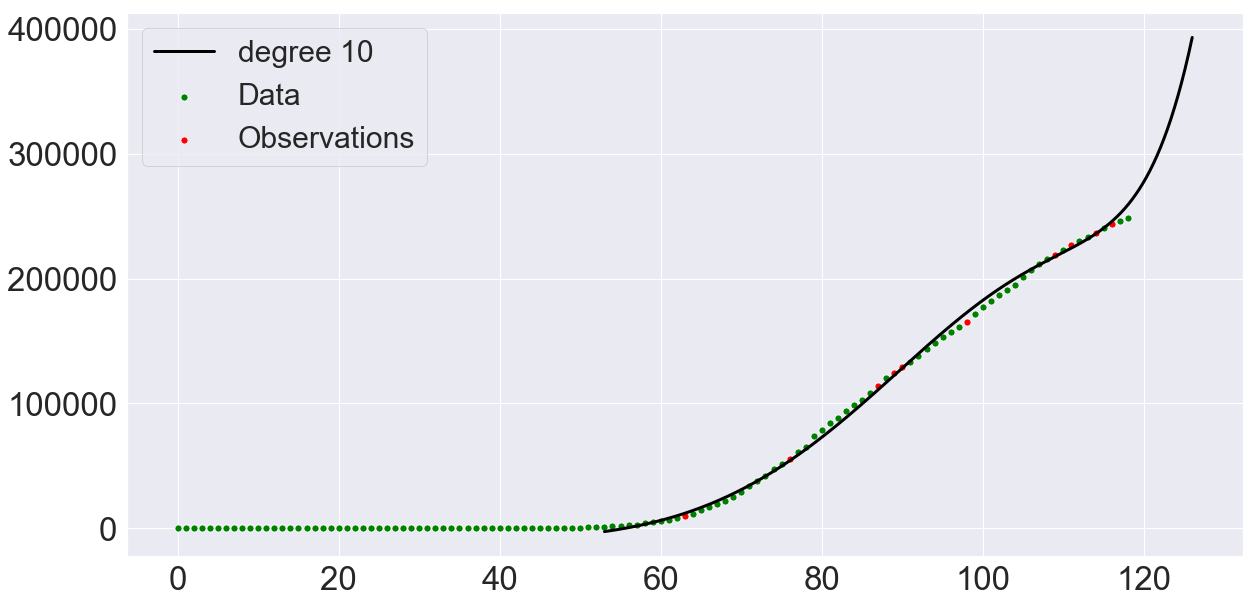

In [17]:
for count, degree in enumerate([4, 5, 10]):
    plt.figure(figsize=(20,10))
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x2.reshape(-1, 1), y2)
    sns.scatterplot(x, y, s=50, color='green', label='Data')
    sns.scatterplot(x2, y2, s=50, color='red', label='Observations')
    ts = np.linspace(x2[0]-10, x2[len(x2)-1]+10, num=1000)
    plt.plot(ts, model.predict(ts.reshape(-1, 1)), color = 'black', linewidth = 3, label="degree %d" % degree)
    plt.legend(fontsize='30')
    plt.show()

#### Non Linear Regression

https://github.com/ineskris/AI4DPredict_spread_COVID-19/blob/master/articles/ModelHill.pdf

In [18]:
from scipy.optimize import curve_fit

In [19]:
def func(t,d,k,n):
    fx = d*(t**n/(t**n + k**n))
    return(fx)

In [20]:
y1 = np.array(list(np.array(case)[50:90]))
x1 = np.arange(1,len(y1)+1)
popt, pcov = curve_fit(func, x1, y1)
print('Estimate : ',popt)

Estimate :  [2.70720555e+05 4.21388412e+01 2.98934441e+00]


/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [21]:
ys = func(x1, *popt)
yr = np.array(list(np.array(case)[50:]))
xr = np.arange(1,len(yr)+1)

No handles with labels found to put in legend.


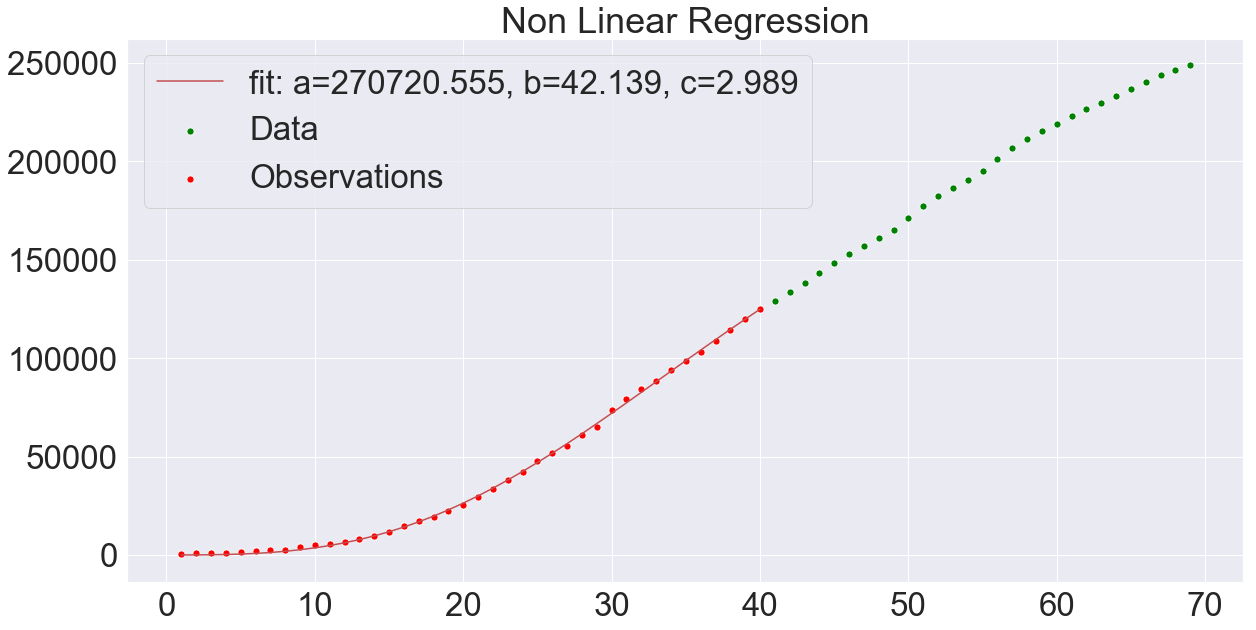

In [22]:
plt.figure(figsize=(20,10))
plt.legend(fontsize='30')
plt.plot(x1, ys , 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
sns.scatterplot(xr, yr, s=50, color='green', label='Data')
sns.scatterplot(x1, y1, s=50, color='red', label='Observations')
plt.title('Non Linear Regression');

## 3. Differential equation

In [23]:
from scipy.integrate import odeint

The SIR model contains the following stages:


![caption](SIRmodel.png)

In [26]:
N0=1000000           # Population size
gamma=1/14       # Recovery rate
R0=2             # R0
beta1=0.3e-06 # Transmission coefficient

# Function for the ODEs
def disease(x,t,beta):
    sdot=-beta*x[0]*x[1]
    idot=beta*x[0]*x[1]-gamma*x[1]
    return sdot, idot

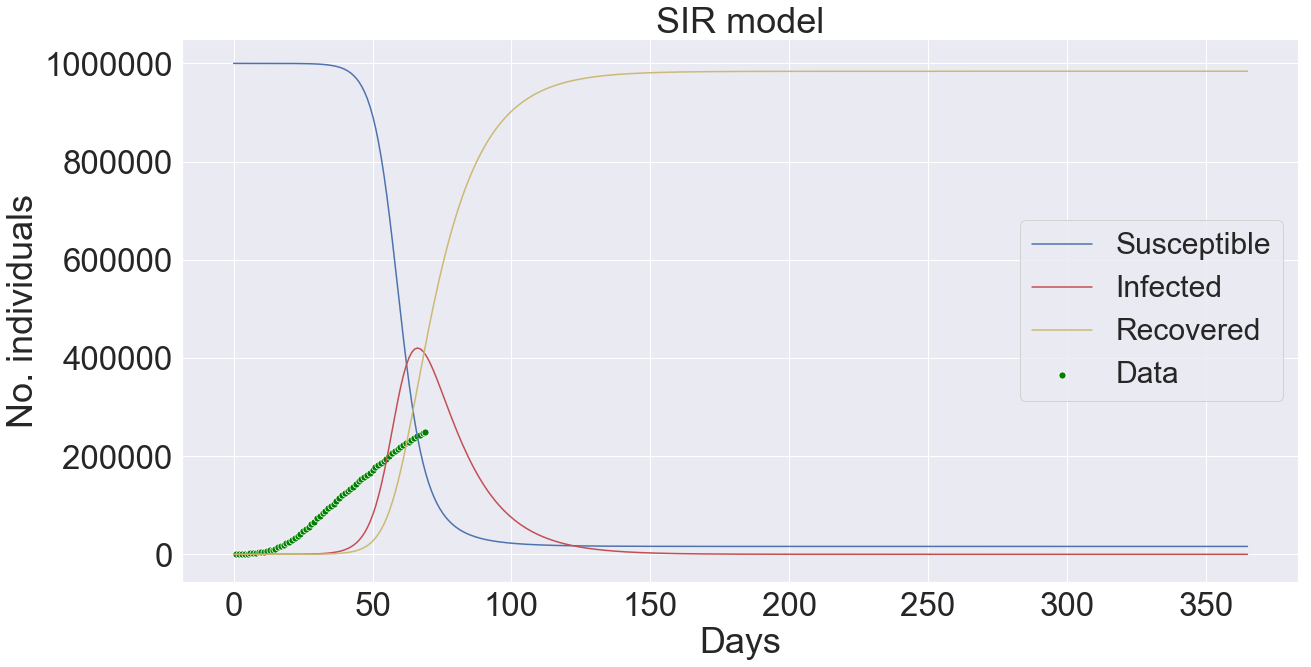

In [27]:
x0=[N0-1,1]  #Initial condition
tex=np.linspace(0,365,365) #Only need a short time span for this example

xx1=odeint(disease,x0,tex,args=(beta1,)) # Run the ODEs


fig1=plt.figure(figsize=(20,10))
plt.plot(tex,(xx1[:,0]),'b',label='Susceptible')
plt.plot(tex,(xx1[:,1]),'r',label='Infected')
plt.plot(tex,(N0-xx1[:,0]-xx1[:,1]),'y',label='Recovered')
plt.xlabel('Days')
plt.ylabel('No. individuals')
inf = np.r_[yr[0], np.diff(yr)]
sns.scatterplot(xr, yr, s=50, color='green', label='Data')
plt.legend(fontsize='30')
plt.title('SIR model');

